# Final Project Phase 3 Summary
This Jupyter Notebook (.ipynb) will serve as the skeleton file for your submission for Phase 3 of the Final Project. Complete all sections below as specified in the instructions for the project, covering all necessary details. We will use this to grade your individual code (Do this whether you are in a group or not). Good luck! <br><br>

Note: To edit a Markdown cell, double-click on its text.

## Jupyter Notebook Quick Tips
Here are some quick formatting tips to get you started with Jupyter Notebooks. This is by no means exhaustive, and there are plenty of articles to highlight other things that can be done. We recommend using HTML syntax for Markdown but there is also Markdown syntax that is more streamlined and might be preferable. 
<a href = "https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671">Here's an article</a> that goes into more detail. (Double-click on cell to see syntax)

# Heading 1
## Heading 2
### Heading 3
#### Heading 4
<br>
<b>BoldText</b> or <i>ItalicText</i>
<br> <br>
Math Formulas: $x^2 + y^2 = 1$
<br> <br>
Line Breaks are done using br enclosed in < >.
<br><br>
Hyperlinks are done with: <a> https://www.google.com </a> or 
<a href="http://www.google.com">Google</a><br>

# Data Collection and Cleaning


Transfer/update the data collection and cleaning you created for Phase II below. You may include additional cleaning functions if you have extra datasets. If no changes are necessary, simply copy and paste your phase II parsing/cleaning functions.


## Downloaded Dataset Requirement



In [ ]:
import pandas as pd #pandas dataframe to collect and parse the data
import gspread #our downloaded dataset is downloaded as a google sheet, so we need to use the gspread library to access the data
from gspread_dataframe import set_with_dataframe
from google.colab import auth #allows the colab to access the google sheet by verifying our google credentials
from oauth2client.client import GoogleCredentials as GC
import google_auth_oauthlib.flow
import googleapiclient.discovery

def data_parser():
  auth.authenticate_user()
  credentials = GC.get_application_default()
  gc = gspread.authorize(credentials)
  url = 'https://docs.google.com/spreadsheets/d/1q2KDY2JXTHBvAj5dH8jD64J9kRWjVUTSK3oKsB4dCPQ/edit#gid=0'
  inputsheet = gc.open_by_url(url).sheet1 #get the sheet data

  rows = inputsheet.get_all_values() #get the data into a list of lists
  header = rows[0]# set header
  rows.pop(0)#removes header so no duplicates
  sp500 = pd.DataFrame(rows, columns = header)
  sp500['Sector'] = sp500['Sector'].replace([''], 'Unknown') # For any blank sector labels, replaces it with Unknown

  #Creates a google spreadsheet in our project folder and updates the spreadsheet with the sp500 Dataframe
  title = 'sp500'
  #gc.create(title) #only needed to run once and now it just updates the same sheet
  outputsheet = gc.open(title).sheet1
  outputsheet.clear()
  set_with_dataframe(outputsheet, sp500)

  return sp500
############ Function Call ############
data_parser()

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie Inc.,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands Inc,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


## Web Collection Requirement \#1


In [ ]:
import pandas as pd #pandas dataframe to collect and parse the data
import pandas_datareader as web #imports pandas_datareader to collect the stock data from online
import gspread #our downloaded dataset is downloaded as a google sheet, so we need to use the gspread library to access the data
from gspread_dataframe import set_with_dataframe
from google.colab import auth #allows the colab to access the google sheet by verifying our google credentials
from oauth2client.client import GoogleCredentials as GC
import google_auth_oauthlib.flow
import googleapiclient.discovery

def web_parser1(ticker_list, st, en):

  prices = pd.DataFrame()

  for ticker in ticker_list:

    #gets historical price data for the company including the date, open, high, low, close, adjusted close, volume
    stock_data = web.DataReader(ticker, 'yahoo', st, en) 

    #makes a dataframe of only the adjusted close data so we can compare the returns
    prices[str(ticker)] = stock_data['Adj Close'] 

  '''
  Since we have scraped the price data we need to find the daily returns of the stocks since our end goal is to find the correlation between them
  We do this using the methods .iloc() and .pct_change()
  We then have to clean the data using .dropna() because otherwise the first row would be 'NaN'

  '''
  returns = pd.DataFrame()
  returns = prices.iloc[((len(prices.index)-1)%1)::1, :].pct_change().dropna()

  auth.authenticate_user()
  credentials = GC.get_application_default()
  gc = gspread.authorize(credentials)

  #Creates a google spreadsheet in our project folder and updates the spreadsheet with the prices Dataframe
  title = 'prices'
  #gc.create(title) #only needed to run once and now it just updates the same sheet
  outputsheet = gc.open(title).sheet1
  outputsheet.clear()
  set_with_dataframe(outputsheet, prices, include_index=True)

  #Creates a google spreadsheet in our project folder and updates the spreadsheet with the returns Dataframe
  title = 'returns'
  #gc.create(title) #only needed to run once and now it just updates the same sheet
  outputsheet = gc.open(title).sheet1
  outputsheet.clear()
  set_with_dataframe(outputsheet, returns, include_index=True)
  
  return returns, prices
############ Function Call ############
web_parser1(['aapl', 'amzn'], '2020-1-1', '2021-1-1')

(                aapl      amzn
 Date                          
 2020-01-03 -0.009722 -0.012139
 2020-01-06  0.007968  0.014886
 2020-01-07 -0.004703  0.002092
 2020-01-08  0.016086 -0.007809
 2020-01-09  0.021241  0.004799
 ...              ...       ...
 2020-12-24  0.007712 -0.003949
 2020-12-28  0.035766  0.035071
 2020-12-29 -0.013315  0.011584
 2020-12-30 -0.008527 -0.010882
 2020-12-31 -0.007703 -0.008801
 
 [252 rows x 2 columns],                   aapl         amzn
 Date                               
 2020-01-02   74.333511  1898.010010
 2020-01-03   73.610840  1874.969971
 2020-01-06   74.197395  1902.880005
 2020-01-07   73.848442  1906.859985
 2020-01-08   75.036385  1891.969971
 ...                ...          ...
 2020-12-24  131.773087  3172.689941
 2020-12-28  136.486053  3283.959961
 2020-12-29  134.668762  3322.000000
 2020-12-30  133.520477  3285.850098
 2020-12-31  132.492020  3256.929932
 
 [253 rows x 2 columns])

## Web Collection Requirement #2

In [ ]:
!pip install tiingo

import pandas as pd #pandas dataframe to collect and parse the data
import pandas_datareader as web #imports pandas_datareader to collect the stock data from online
import gspread #our downloaded dataset is downloaded as a google sheet, so we need to use the gspread library to access the data
from gspread_dataframe import set_with_dataframe
from google.colab import auth #allows the colab to access the google sheet by verifying our google credentials
from oauth2client.client import GoogleCredentials as GC
import google_auth_oauthlib.flow
import googleapiclient.discovery
import os
from tiingo import TiingoClient

auth.authenticate_user() #authenticating google sheets
credentials = GC.get_application_default()
gc = gspread.authorize(credentials)

def web_parser2(ticker, st, en, metric):
  config = {}
  config['session'] = True
  config['api_key'] = '917582d06669379cc3d3f4c10fd9e012923f05d7'
  client = TiingoClient(config)
  ticker_data = client.get_dataframe(ticker, frequency='daily', metric_name= metric, startDate=st,endDate=en)
  ticker_data.index = pd.DatetimeIndex(ticker_data.index).date #cleaning the time off the index of the dataset
  final_data = pd.DataFrame(data = ticker_data)
  final_data.columns = [ticker]
  #Creates a google spreadsheet in our project folder and updates the spreadsheet with the returns Dataframe
  title = 'tiingo data'
  #gc.create(title) #only needed to run once and now it just updates the same sheet
  outputsheet = gc.open(title).sheet1
  outputsheet.clear()
  set_with_dataframe(outputsheet, final_data, include_index=True)
  return final_data
  
############ Function Call ############
web_parser2('AAPL', '2020-1-1', '2021-1-1', 'volume')

,AAPL
2020-01-02,33911864
2020-01-03,36633878
2020-01-06,29644644
2020-01-07,27877655
2020-01-08,33090946
...,...
2020-12-24,54930064
2020-12-28,123124632
2020-12-29,121047324
2020-12-30,96452124


#Inconsistency Revisions
 **If you were requested to revise your inconsistency section from Phase II, enter your responses here. Otherwise, ignore this section.**

For each inconsistency (NaN, null, duplicate values, empty strings, etc.) you discover in your datasets, write at least 2 sentences stating the significance, how you identified it, and how you handled it.

1. 

2. 

3. 

4. (if applicable)

5. (if applicable)


## Data Sources

Include sources (as links) to your datasets. If any of these are different from your sources used in Phase II, please <b>clearly</b> specify.

*   Downloaded Dataset Source:
*   Web Collection #1 Source:
*   Web Collection #2 Source:



# Data Analysis
For the Data Analysis section, you are required to utilize your data to complete the following:

*   Create at least 5 insights
*   Generate at least 3 data visualizations
*   Export aggregated data to at least 1 summary file 

Create a function for each of the following sections mentioned above. Do not forget to fill out the explanation section for each function. 

Make sure your data analysis is not too simple. Performing complex aggregation and using modules not taught in class shows effort, which will increase the chance of receiving full credit. 

# Graphical User Interface (GUI) Implementation
If you decide to create a GUI for Phase II, please create a separate Python file (.py) to build your GUI. You must submit both the completed PhaseII.ipynb and your Python GUI file.

## Insights

In [ ]:
import datetime as dt

def insight1():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  returns, prices = web_parser1(tckr_list, start, end)
  correlation_df = returns.corr(method='pearson')
  for row in range(len(tckr_list)):
    for col in range(len(tckr_list)):
      if col < row:
        correlation_df.iloc[row, col] = ""
  return correlation_df
  
############ Function Call ############
insight1()

Enter number of stocks to compare: 3
Ticker 1: fb
Ticker 2: aapl
Ticker 3: amzn
Enter the starting date(YYYY-MM-DD): 2020-01-01
Enter the ending date(YYYY-MM-DD): 2021-01-01


,FB,AAPL,AMZN
FB,1,0.767148,0.681523
AAPL,,1,0.697236
AMZN,,,1.000000


### Insight 1 Explanation

This function provides insight on the correlation between each stock. To get the output the user must input information first. This information includes: the number of stock they wish to compare, each stock ticker, the start and end date for the correlation calculation. Once this information has been inputed by the user, the function uses the returns from web_parse1 to generate the correlation matrix. This is acheived by using the .corr(method = 'pearson') method which provides the standard correlation coeffeecient between each stock. This information is extremely valuable when determining portfolio allocation in finance as you generally do not want all of your stocks to be exactly correlated.



In [ ]:
import numpy as np
import datetime as dt

def insight2():
  tckr_list = ['SPY']
  tckr = input("Input ticker of stock to find the Beta: ")
  tckr_list.append(tckr)
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  returns, prices = web_parser1(tckr_list, start, end)
  correlation = returns.corr(method='pearson')
  corrcoef = correlation.iloc[0][tckr]
  std_stock = np.std(returns[tckr])
  std_spy = np.std(returns['SPY'])
  beta = corrcoef *(std_stock/std_spy)
  output = 'Beta of ' + tckr + ' = ' + str(beta)
  return output
############ Function Call ############
insight2()

Input ticker of stock to find the Beta: AAPL
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


'Beta of AAPL = 1.1570794769938433'

### Insight 2 Explanation

This function provides insight on the beta value between each stock. To get the output the user must input information first. This information includes: the stock they wish to find the beta of the start and end date for the beta calculation. Once this information has been inputed by the user, the function uses the returns from web_parse1 to generate the  correlation coeffeecient similar to insight 1. We then use numpy to find the standard deviation of the stock and the market index, we used SPY. This information is extremely valuable when determining how much risk or volatily is involved in a certain stock. Typically, if beta > 1 the stock has more volatilty and if beta < 1 the stock has less volatilty than the market.

In [ ]:
import datetime as dt

def insight3():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start =  dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  average_dict = {}
  for i in tckr_list:
    avg = web_parser2(i, start, end, 'volume')[i].mean()
    average_dict[i] = avg

  return average_dict
############ Function Call ############
insight3()

Enter number of stocks to compare: 4
Ticker 1: aapl
Ticker 2: msft
Ticker 3: amzn
Ticker 4: sq
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


{'AAPL': 73330367.3715415,
 'AMZN': 4930845.628458498,
 'MSFT': 37649231.023715414,
 'SQ': 12169482.272727273}

### Insight 3 Explanation

This function provides insight on the average daily volume between each stock. To get the output the user must input information first. This information includes: the number of stock they wish to compare, each stock ticker, the start and end date for the calculation. Once this information has been inputed by the user, the function uses web_parse2 to get the volume data for each stock. We then used the built in pandas dataframe method .mean() to get the average of the volume between the start and end date. This information is extremely valuable when determining whether to invest in a certain stock or not, because if a stock does not have adequate liquidity you may not be able to buy or sell the stock.


In [ ]:
def insight4():
  sp500 = data_parser()
  n = int(input("Enter number of stocks to identify: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  s_list = sp500.values.tolist()
  final_list = []
  rows = []
  for tckr in tckr_list:
    exists = False
    for row in s_list:
      if tckr in row:
        exists = True
        rows.append(row)
        break
    if exists == False:
      rows.append([tckr, 'Not in the S&P 500', 'Not in the S&P 500'])

  final_df = pd.DataFrame(rows, columns = ['Symbol', 'Name', 'Sector'])
  return final_df

############ Function Call ############
insight4()

Enter number of stocks to identify: 5
Ticker 1: aapl
Ticker 2: lulu
Ticker 3: amzn
Ticker 4: pltr
Ticker 5: mmm


,Symbol,Name,Sector
0,AAPL,Apple Inc.,Information Technology
1,LULU,Not in the S&P 500,Not in the S&P 500
2,AMZN,Amazon.com Inc.,Consumer Discretionary
3,PLTR,Not in the S&P 500,Not in the S&P 500
4,MMM,3M Company,Industrials


### Insight 4 Explanation

This function provides determines if a certains stock is in the S&P 500. To get the output the user must input information first. This information includes: the number of stock they wish to compare and each stock ticker. Once this information has been inputed by the user, the function uses the uses data_parser() to get a list of the S&P 500 stocks. We then iterate through the list of stock tickers the user provided and check if they are in the S&P 500 list. If the ticker is in the list, the function adds a row including the ticker, the name of the company, and the sector of the company to the output data frame. If the ticker is not in the list, it adds a row including the ticker and a string of 'Not in the S&P 500' for each column. This information is extremely valuable when determining what stocks to invest in. The S&P 500 is an index of the 500 largest publicly traded companies in the United States. It is helpful to identify if a company is in the S&P500 as these companies are often stable investments and usually considered 'blue chips' in the stock market.

In [ ]:
import datetime as dt
import numpy as np
import pandas as pd

def insight5():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  average_dict = {}
  for i in tckr_list:
     div = web_parser2(i, start, end, 'divCash')
     price = web_parser2(i, start, end, 'adjClose')
     df = pd.concat([div, price], axis = 1, names = None)
     df = df.replace(0.0, np.nan).dropna()
     if df.empty:
       print(i + ' Does not pay a dividend')
       continue
     df.columns = [i + ' Dividend Cash', i + ' Price']
     df[i + ' Q Dividend Yield'] = (df[i + ' Dividend Cash']*4)/df[i + ' Price']
     print(df)

############ Function Call ############
insight5()

Enter number of stocks to compare: 5
Ticker 1: aapl
Ticker 2: amzn
Ticker 3: jpm
Ticker 4: googl
Ticker 5: ko
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1
            AAPL Dividend Cash  AAPL Price  AAPL Q Dividend Yield
2020-02-07               0.770   79.393221               0.038794
2020-05-08               0.820   77.140650               0.042520
2020-08-07               0.820  110.754900               0.029615
2020-11-06               0.205  118.512353               0.006919
AMZN Does not pay a dividend
            JPM Dividend Cash   JPM Price  JPM Q Dividend Yield
2020-01-03                0.9  132.604689              0.027148
2020-04-03                0.9   81.428136              0.044211
2020-07-02                0.9   90.641480              0.039717
2020-10-05                0.9   97.762891              0.036824
GOOGL Does not pay a dividend
            KO Dividend Cash   KO Price  KO Q Dividend Yield
2020-03-13              0.41  

### Insight 5 Explanation

This function determines the dividend yields for each stock. To get the output the user must input information first. This information includes: the number of stock they wish to compare, each stock ticker, the start and end date for the dividend yield calculation. First, we must determine whether or not a company pays out a dividend. If the company does, it calculates the Quarterly Dividend Yield for each stock. This is calculated by multiplying each dividend payout by 4, then divided that sum by the price on the day the dividend was paid to stock holders. This information is extremely valuable when considering the value of a stock. This statistic can help investors calculate the potential profit for every dollar invested.

## Data Visualizations

Input ticker of stock to visualize: AAPL
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


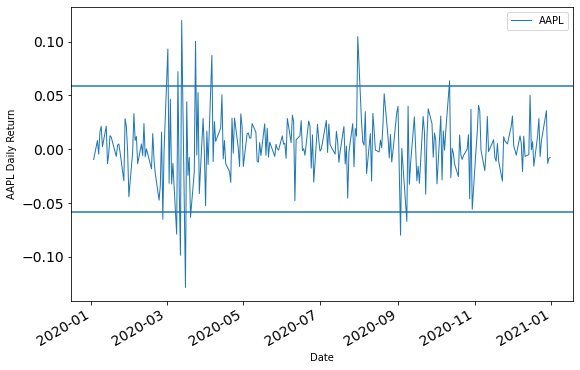

In [ ]:
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
def visual1():
  tckr_list = [input("Input ticker of stock to visualize: ")]
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  returns, prices = web_parser1(tckr_list, start, end)
  std = float(np.std(returns))
  returns.plot(figsize = (9,6), linewidth = 1, fontsize = 14)
  plt.axhline(y= 2*float(std), xmin = 0, xmax = 1)
  plt.axhline(y= -2*float(std), xmin = 0, xmax = 1)
  plt.xlabel("Date")
  plt.ylabel(tckr_list[0] + " Daily Return")  
  plt.show()
############ Function Call ############
visual1()

### Visualization 1 Explanation

This is a Daily return visualization with standard deviation for context. We got the data for this visualization from Web_parser1. To get the output visualization the user must input information first. This information includes: the stock they wish to graph and the start and end date for the graph. Once this information has been inputed by the user, the function outputs a line graph that has the daily returns for the stock as we as a line along the positive and negative of two standard deviations. These lines help us put the returns into context and see if there are periods of volatiltiy. For the graph above of AAPL we can see that the period around March, 2020 was particulary volatile because it had many returns outside of the 2 standard deviation line. 


Enter number of stocks to compare: 3
Ticker 1: aapl
Ticker 2: amzn
Ticker 3: fb
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


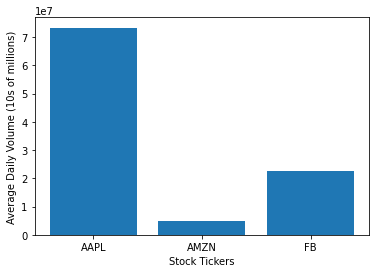

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt

def visual2():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start =  dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  average_dict = {}
  for i in tckr_list:
    avg = web_parser2(i, start, end, 'volume')[i].mean()
    average_dict[i] = avg

  keys = average_dict.keys()
  values = average_dict.values()
  plt.bar(keys, values)
  plt.xlabel("Stock Tickers")
  plt.ylabel('Average Daily Volume (10s of millions)') 
############ Function Call ############
visual2()

### Visualization 2 Explanation


This is a average daily volume visualization between stocks. We got the data for this visualization from insight 3. To get the output visualization the user must input information first. This information includes: the number of stock they wish to compare, each stock ticker, the start and end date for the calculation. Once this information has been inputed by the user, the function outputs a bar graph that plots the average daily volumes of the stock. This bar graph helps us visualize the differences in liquidity between stocks. This information is extremely valuable when determining whether to invest in a certain stock or not, because if a stock does not have adequate liquidity you may not be able to buy or sell the stock.

Enter number of stocks to compare: 5
Ticker 1: aapl
Ticker 2: amzn
Ticker 3: fb
Ticker 4: sq
Ticker 5: v
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


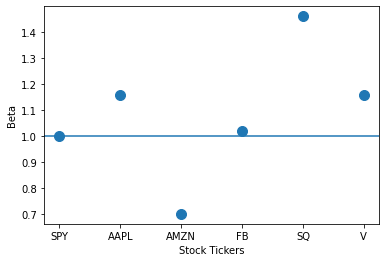

In [ ]:
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

def visual3():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  tckr_list.append('SPY')
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')

  betas = {}
  for i in tckr_list:
    returns, prices = web_parser1([tckr_list[0], i], start, end)
    correlation = returns.corr(method='pearson')
    corrcoef = correlation.iloc[0][i]
    std_stock = np.std(returns[i])
    std_spy = np.std(returns['SPY'])
    beta = corrcoef *(std_stock/std_spy)
    betas[i] = beta

  keys = betas.keys()
  values = betas.values()
  plt.scatter(keys, values, s = 100)
  plt.xlabel("Stock Tickers")
  plt.ylabel('Beta')
  plt.axhline(y= 1                                                                                                        , xmin = 0, xmax = 1) 

############ Function Call ############
visual3()

### Visualization 3 Explanation


This is a Beta values visualization between stocks. We got the data for this visualization from insight 2. To get the output visualization the user must input information first. This information includes: the number of stock they wish to compare, each stock ticker, the start and end date for the calculation. Once this information has been inputed by the user, the function outputs a scatter plot of the different beta values of the stocks. We have also decided to include a plot of the market index beta value as well as a line across the graph at this value. This helps us visualize if a certain stock is more or less volatile than the market. A marker below the line would indicate less volatilty and a marker above the line would indicate more volatilty than the market.

## Summary Files

In [ ]:
from google.colab import files
import datetime as dt

def summary1():
  n = int(input("Enter number of stocks to compare: "))
  tckr_list = []
  # iterates for each tckr
  for i in range(n):
      ele = input("Ticker " + str(i+1) + ": ")
      tckr_list.append(ele.upper())  # adding the element
  start = dt.datetime.strptime(input("Enter the starting date(YYYY-MM-DD): "), '%Y-%m-%d')
  end = dt.datetime.strptime(input("Enter the ending date(YYYY-MM-DD): "), '%Y-%m-%d')
  returns, prices = web_parser1(tckr_list, start, end)
  correlation_df = returns.corr(method='pearson')
  for row in range(len(tckr_list)):
    for col in range(len(tckr_list)):
      if col < row:
        correlation_df.iloc[row, col] = ""
  filename = 'correlation.csv'
  correlation_df.to_csv(filename) 
  files.download(filename)

############ Function Call ############
summary1()

Enter number of stocks to compare: 12
Ticker 1: aapl
Ticker 2: amzn
Ticker 3: spy
Ticker 4: fb
Ticker 5: sq
Ticker 6: v
Ticker 7: vz
Ticker 8: aal
Ticker 9: lulu
Ticker 10: mmm
Ticker 11: bac
Ticker 12: tsla
Enter the starting date(YYYY-MM-DD): 2020-1-1
Enter the ending date(YYYY-MM-DD): 2021-1-1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Cited Sources

If you used any additional sources to complete your Data Analysis section, list them here:


*   Example Module Documentation
*   Example Stack Overflow Assistance



# Video Presentation

If you uploaded your Video Presentation to Bluejeans, YouTube, or any other streaming services, please provide the link here:


*   https://bluejeans.com/s/kCy3GjSlWyO


Make sure the video sharing permissions are accessible for anyone with the provided link.

# Submission

Prior to submitting your notebook to Gradescope, be sure to <b>run all functions within this file</b>. We will not run your functions ourselves, so we must see your outputs within this file in order to receive full credit.
